# 1) Gregors:
##### Fecha entrega: 28/10/2023.
##### (Esto fue una tarea que se dio hace dos semanas)
##### Las entregas se enumeran a continuación

## a. EDA personal:
#### Enfocarse en las variables order_has_email y order_has_phone respecto a la conversión mensual y compararlo a las variables de horario segun zona geografica.

## b. Diapositiva 5 Slides
#### Utiliza el Pyramid Principle de Barbra Minto para estructurar tus hallazgos en una presentación PowerPoint de 5 diapositivas.


####  → Link a la presentación de Google Slides: https://docs.google.com/presentation/d/1SYFqnqFuPYmibfsy-NEGezw4-aJz3Fl_Ks0JbrDRxW4/edit?usp=sharing

___

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_gregors = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/1-gregors/gregors.csv")

___

## Validación de la data

In [ ]:
from data_validation import validate_columns
validate_columns(df_gregors)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Client Domain,1,4090,0,0.000000,"[A, A, A, A, A]"
User Phone Timezone,8,4090,0,0.000000,"[CST, EST, MST, CST, CST]"
Created At,4090,4090,0,0.000000,"[2022-11-29T16:02:35.380861Z, 2023-02-28T20:58..."
Email Clicks,NaN,4090.0,0,0.000000,"[0, 0, 0, 0, 1]"
Email Opens,NaN,4090.0,0,0.000000,"[0, 0, 0, 0, 0]"
Emails,NaN,4074.0,16,0.391198,"[0.0, 0.0, 0.0, 0.0, 4.0]"
Expired,NaN,4090.0,0,0.000000,"[1, 1, 1, 1, 1]"
Order Funnel State,9,4090,0,0.000000,"[2-Notification sent, 7-Viewed provider login,..."
Sms,NaN,4074.0,16,0.391198,"[1.0, 1.0, 1.0, 1.0, 1.0]"
Sms Clicks,NaN,4090.0,0,0.000000,"[0, 1, 1, 0, 1]"


In [ ]:
df_gregors["User Phone Timezone"].value_counts(normalize=True)

User Phone Timezone
CST        0.577017
EST        0.313447
Unknown    0.061125
PST        0.031296
MST        0.013203
AST        0.001956
UTC-10     0.001222
UTC-9      0.000733
Name: proportion, dtype: float64

In [ ]:
(df_gregors.isna().sum()/len(df_gregors)).round(4) # porcentaje de nulos

Client Domain                              0.0000
User Phone Timezone                        0.0000
Created At                                 0.0000
Email Clicks                               0.0000
Email Opens                                0.0000
Emails                                     0.0039
Expired                                    0.0000
Order Funnel State                         0.0000
Sms                                        0.0039
Sms Clicks                                 0.0000
Sms Opens                                  0.0000
Platforms Order Group - Order → Manager    0.0000
Platforms Order Group - Order → Source     0.0000
order_has_user_email                       0.0000
order_has_user_phone                       0.0000
dtype: float64

___

## Tratamiento de faltantes

In [ ]:
df_gregors[df_gregors["Sms"].isna()][["Order Funnel State","Email Opens","Sms Opens"]].value_counts()

Order Funnel State  Email Opens  Sms Opens
1-Created           0            0            16
Name: count, dtype: int64

In [ ]:
df_gregors[df_gregors["Emails"].isna()][["Order Funnel State","Email Opens","Sms Opens"]].value_counts()

Order Funnel State  Email Opens  Sms Opens
1-Created           0            0            16
Name: count, dtype: int64

##### → Hay valores que son nulos en Emails y SMS (en una etapa temprana del funnel). Además el porcentaje de valores faltantes es muy bajo y no hay casos extremos. Por lo tanto, podemos eliminar esos ejemplos.

In [ ]:
df_gregors = df_gregors.dropna(subset="Emails")
df_gregors[df_gregors["Emails"].isna()].shape

(0, 15)

In [ ]:
df_gregors.dropna(subset="Sms",inplace=True)

In [ ]:
df_gregors.Sms.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
4085    False
4086    False
4087    False
4088    False
4089    False
Name: Sms, Length: 4074, dtype: bool

In [ ]:
df_gregors = df_gregors.dropna(subset="Sms")

___

## Veo los tipos de datos con dtypes

In [ ]:
df_gregors.dtypes

Client Domain                               object
User Phone Timezone                         object
Created At                                  object
Email Clicks                                 int64
Email Opens                                  int64
Emails                                     float64
Expired                                      int64
Order Funnel State                          object
Sms                                        float64
Sms Clicks                                   int64
Sms Opens                                    int64
Platforms Order Group - Order → Manager     object
Platforms Order Group - Order → Source      object
order_has_user_email                          bool
order_has_user_phone                          bool
dtype: object

In [ ]:
df_gregors["Client Domain"].value_counts()

Client Domain
A    4074
Name: count, dtype: int64

In [ ]:
df_gregors[["order_has_user_phone","order_has_user_email"]].value_counts()

order_has_user_phone  order_has_user_email
True                  False                   2736
                      True                    1099
False                 True                     239
Name: count, dtype: int64

___

## Análisis del Conversion Rate

In [ ]:
# Convierto 'Created At' a datetime
df_gregors["Created At"] = pd.to_datetime(df_gregors["Created At"])
# Saco día, mes y año.
df_gregors["Day"] = df_gregors["Created At"].dt.day
df_gregors["Month"] = df_gregors["Created At"].dt.month
df_gregors["Year"] = df_gregors["Created At"].dt.year

In [ ]:
# Función para calcular y graficar el porcentaje de usuarios que completaron el funnel de conversión

def plot_conversion_rate(df_gregors, title):
    completed_df = df_gregors[df_gregors['Order Funnel State'] == '9-Completed']
    completed_grouped = completed_df.groupby(['Year', 'Month']).size().reset_index(name='Completed_Count')
    total_grouped = df_gregors.groupby(['Year', 'Month']).size().reset_index(name='Total_Count')
    conversion_df = pd.merge(total_grouped, completed_grouped, on=['Year', 'Month'], how='left').fillna(0)
    conversion_df['Conversion_Rate'] = (conversion_df['Completed_Count'] / conversion_df['Total_Count']) * 100
    conversion_df['Year_Month'] = conversion_df['Year'].astype(str) + '-' + conversion_df['Month'].astype(str).str.zfill(2)
    
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Year_Month', y='Conversion_Rate', data=conversion_df, marker='o')
    plt.title(title)
    plt.xlabel('Year-Month')
    plt.ylabel('Conversion Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


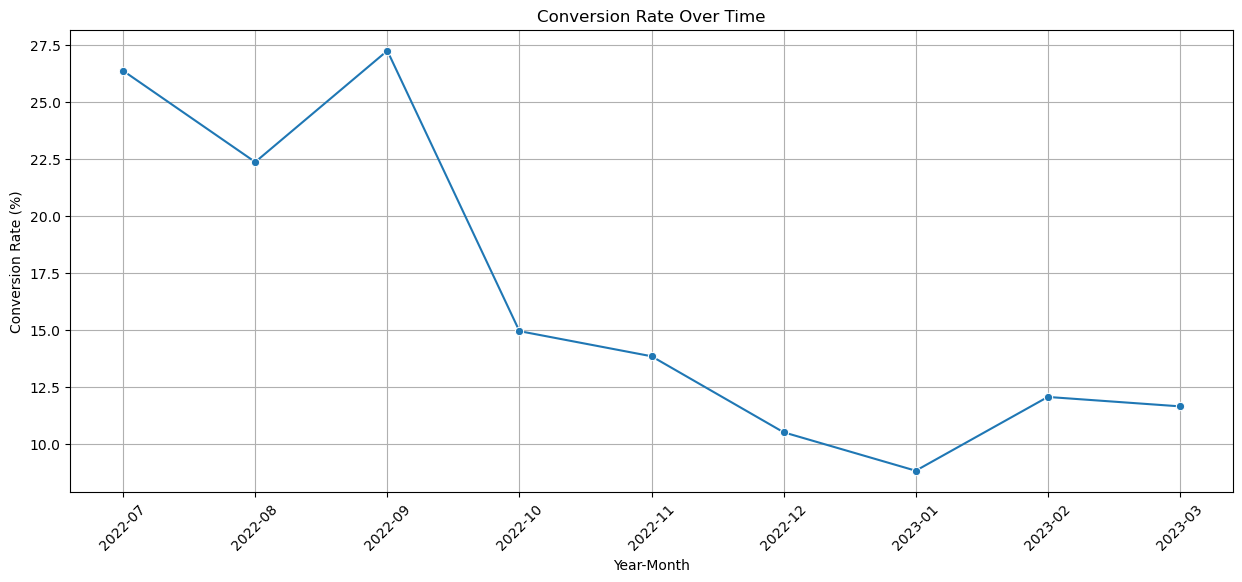

In [ ]:
plot_conversion_rate(df_gregors, 'Conversion Rate Over Time')

### Conversion rate de Emails vs Clicks

In [ ]:
# Filtro data para Email interactions
email_df = df_gregors[(df_gregors['Sms Clicks'] == 0) & (df_gregors['Email Clicks'] > 0)]

# Filtro data para Sms interactions
sms_df = df_gregors[(df_gregors['Email Clicks'] == 0) & (df_gregors['Sms Clicks'] > 0)]

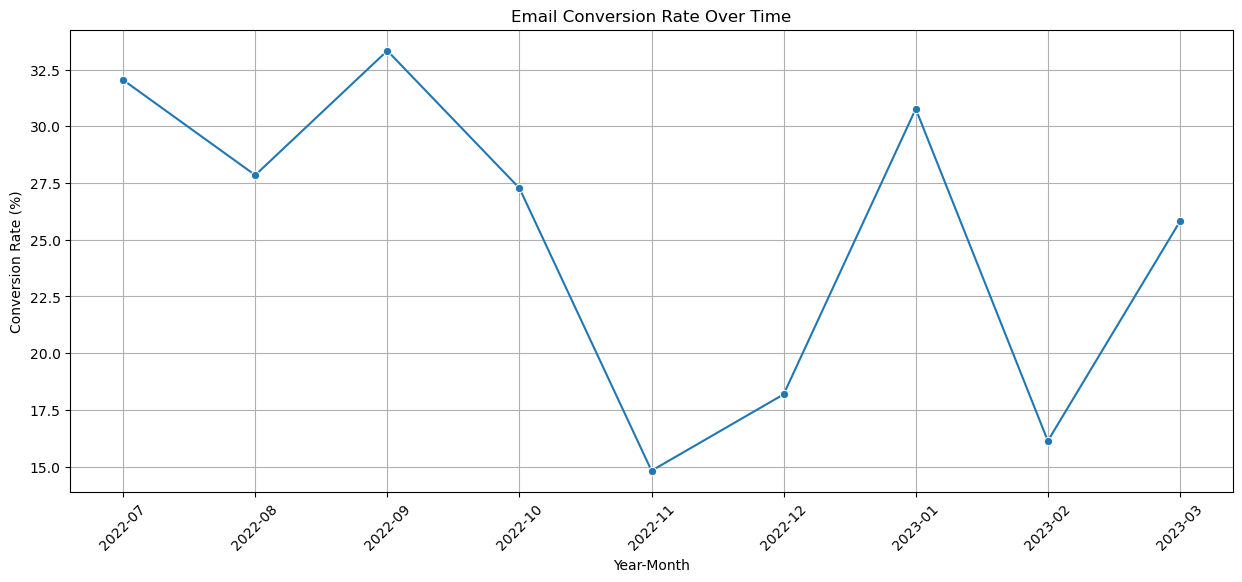

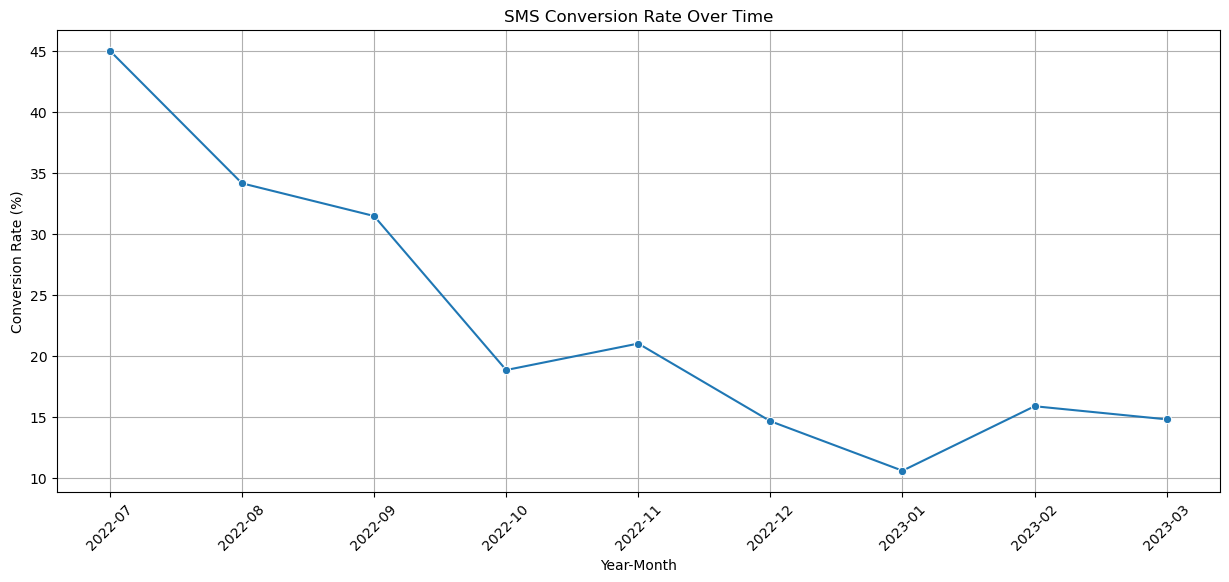

In [ ]:
# Plotteo conversion rate para Email interactions
plot_conversion_rate(email_df, 'Email Conversion Rate Over Time')

# Plotteo conversion rate para Sms interactions
plot_conversion_rate(sms_df, 'SMS Conversion Rate Over Time')


___

## "User Phone Timezone"

##### Algo que sería bueno para pensar es si el horario de la zona geográfica del usuario tiene algo que ver con la conversión. Lo más lógico sería pensar que sí, ya que si el usuario si está durmiendo o trabajando, es probable de que no vaya a abrir las notificaciones. Entonces, voy a ver si hay alguna relación entre el horario de la zona geográfica del usuario y la conversión.

In [ ]:
df_gregors["User Phone Timezone"].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

User Phone Timezone
CST        0.578547
EST        0.313451
Unknown    0.059401
PST        0.031419
MST        0.013255
AST        0.001964
UTC-10     0.001227
UTC-9      0.000736
Name: proportion, dtype: float64

In [ ]:
df_timezone = df_gregors[df_gregors["User Phone Timezone"]!= "Unknown"] # Me quedo con los que no son Unknown

In [ ]:
formato_timezone = {'EST':'America/New_York', 
            'CST':'America/Chicago', 
            'PST':'America/Los_Angeles',
            'MST':'America/Denver',
            'AST':'America/Puerto_Rico',
                   'UTC-10':'Pacific/Honolulu',
                     'UTC-9':'America/Anchorage'
                   }

df_timezone["hrs-pyz"] = df_timezone["User Phone Timezone"].map(formato_timezone)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_29645/9800537.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timezone["hrs-pyz"] = df_timezone["User Phone Timezone"].map(formato_timezone)


In [ ]:
df_timezone["hrs-pyz"].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

hrs-pyz
America/Chicago        0.615084
America/New_York       0.333246
America/Los_Angeles    0.033403
America/Denver         0.014092
America/Puerto_Rico    0.002088
Pacific/Honolulu       0.001305
America/Anchorage      0.000783
Name: proportion, dtype: float64

## Convierto a la zona horaria del usuario

In [ ]:
import pytz
import pandas as pd

def convert_to_local_time(row):
    try:
        if pd.isnull(row['Created At']) or row['User Phone Timezone'] is None:
            return row['Created At']
        
        local_tz = pytz.timezone(row['hrs-pyz'])
        
        if row['Created At'].tzinfo is not None:
            local_time = row['Created At'].astimezone(local_tz)
        else:  
            utc_time = pytz.utc.localize(row['Created At'])
            local_time = utc_time.astimezone(local_tz)
        
        return local_time
    except Exception as e:
        print(f"Row with error {row['Created At']} -> to {row['hrs-pyz']}")
        return row['Created At']
    
df_timezone['local_time'] = df_timezone.apply(convert_to_local_time, axis=1)
df_timezone

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_29645/2850778909.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timezone['local_time'] = df_timezone.apply(convert_to_local_time, axis=1)


,Client Domain,User Phone Timezone,Created At,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Platforms Order Group - Order → Manager,Platforms Order Group - Order → Source,order_has_user_email,order_has_user_phone,Day,Month,Year,hrs-pyz,local_time
194,A,EST,2023-01-20 19:03:11.624372+00:00,2,0,4.0,1,6-Employer selected,1.0,1,0,masked@order_manager.org,internal,True,True,20,1,2023,America/New_York,2023-01-20 14:03:11.624372-05:00
195,A,EST,2022-07-12 17:44:08.149542+00:00,1,1,1.0,0,9-Completed,1.0,1,0,masked@order_manager.org,internal,True,True,12,7,2022,America/New_York,2022-07-12 13:44:08.149542-04:00
196,A,EST,2022-08-08 20:24:56.757669+00:00,1,1,1.0,0,9-Completed,1.0,0,0,masked@order_manager.org,internal,True,True,8,8,2022,America/New_York,2022-08-08 16:24:56.757669-04:00
197,A,EST,2022-11-28 17:32:59.758117+00:00,0,4,4.0,1,7-Viewed provider login,1.0,1,0,masked@order_manager.org,internal,True,True,28,11,2022,America/New_York,2022-11-28 12:32:59.758117-05:00
198,A,EST,2022-07-07 15:39:00.538025+00:00,4,4,4.0,1,5-Widget loaded,1.0,1,0,masked@order_manager.org,internal,True,True,7,7,2022,America/New_York,2022-07-07 11:39:00.538025-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,A,CST,2022-07-18 18:21:37.529621+00:00,1,1,4.0,1,7-Viewed provider login,1.0,0,0,masked@order_manager.org,internal,True,True,18,7,2022,America/Chicago,2022-07-18 13:21:37.529621-05:00
4033,A,CST,2022-07-14 18:19:03.889063+00:00,0,0,4.0,1,8-Submitted login,1.0,1,0,masked@order_manager.org,internal,True,True,14,7,2022,America/Chicago,2022-07-14 13:19:03.889063-05:00
4034,A,CST,2022-08-18 20:30:09.688551+00:00,0,0,0.0,1,7-Viewed provider login,1.0,1,0,masked@order_manager.org,internal,False,True,18,8,2022,America/Chicago,2022-08-18 15:30:09.688551-05:00
4035,A,EST,2022-10-27 18:09:06.743787+00:00,0,0,0.0,1,7-Viewed provider login,1.0,1,0,masked@order_manager.org,internal,False,True,27,10,2022,America/New_York,2022-10-27 14:09:06.743787-04:00


### Horario

In [ ]:
def check_hour(horario):
    horario = str(horario)
    return horario.split(" ")[1].split(":")[0]

df_timezone['local_time_apply'] = df_timezone['local_time'].apply(check_hour)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_29645/2172854425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timezone['local_time_apply'] = df_timezone['local_time'].apply(check_hour)


In [ ]:
df_timezone['local_time_apply'] = df_timezone['local_time_apply'].astype(int)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_29645/3403680473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timezone['local_time_apply'] = df_timezone['local_time_apply'].astype(int)


<Axes: xlabel='local_time_apply', ylabel='Count'>

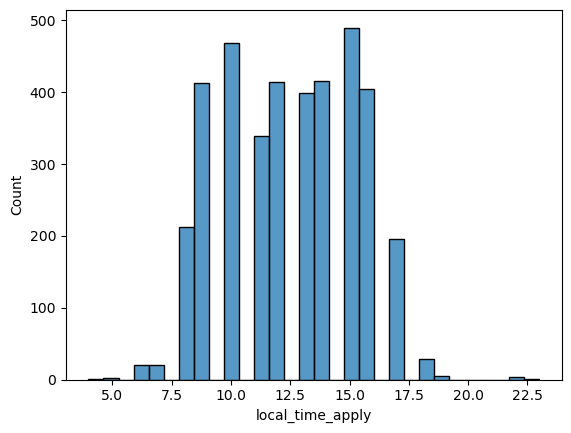

In [ ]:
import seaborn as sns

sns.histplot(data=df_timezone, x="local_time_apply")


<Axes: xlabel='local_time_apply'>

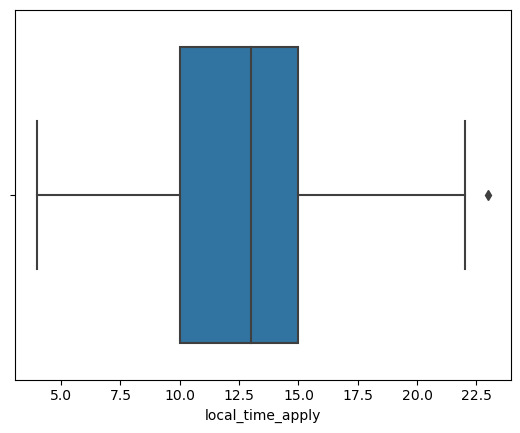

In [ ]:
sns.boxplot(data=df_timezone, x="local_time_apply")

In [ ]:
df_timezone["conversion"] = df_timezone['Order Funnel State'] == "9-Completed"

df_timezone["conversion"] = df_timezone["conversion"].astype(int)

conv_df = df_timezone.groupby('local_time_apply', as_index=True).agg(cant_conversion = ("conversion","sum"),
                                       totales = ("conversion","count") )

conv_df["%_conversion"] = conv_df["cant_conversion"]/conv_df["totales"]
conv_df

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_29645/3703091771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timezone["conversion"] = df_timezone['Order Funnel State'] == "9-Completed"
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_29645/3703091771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timezone["conversion"] = df_timezone["conversion"].astype(int)


,cant_conversion,totales,%_conversion
local_time_apply,,,
4,1,1,1.000000
5,0,2,0.000000
6,5,20,0.250000
7,2,20,0.100000
8,37,213,0.173709
9,72,413,0.174334
10,74,468,0.158120
11,48,339,0.141593
12,73,414,0.176329


In [ ]:
conv_df_by_tz = df_timezone.groupby(['hrs-pyz','local_time_apply'], as_index=True).agg(cant_conversion = ("conversion","sum"),
                                       totales = ("conversion","count") )

conv_df_by_tz["%_conversion"] = conv_df_by_tz["cant_conversion"]/conv_df_by_tz["totales"]
conv_df_by_tz

cant_conversion  totales  %_conversion
hrs-pyz             local_time_apply                                        
America/Anchorage   5                               0        1      0.000000
                    7                               0        1      0.000000
                    13                              0        1      0.000000
America/Chicago     7                               0        2      0.000000
                    8                              35      191      0.183246
                    9                              40      281      0.142349
                    10                             32      299      0.107023
                    11                             30      178      0.168539
                    12                             47      251      0.187251
                    13                             35      231      0.151515
                    14                             34      248      0.137097
                    15                             40      338      0.118343
                    16                             37      282      0.131206
                    17                              9       47      0.191489
                    18                              0        7      0.000000
                    22                              1        2      0.500000
America/Denver      7                               0        4      0.000000
                    8                               1        6      0.166667
                    9                               2        8      0.250000
                    10                              2        4      0.500000
                    11                              3        5      0.600000
                    12                              1        8      0.125000
                    13                              0        6      0.000000
                    14                              0        9      0.000000
                    15                              0        4      0.000000
America/Los_Angeles 5                               0        1      0.000000
                    6                               5       19      0.263158
                    7                               2       13      0.153846
                    8                               1       16      0.062500
                    9                               1       14      0.071429
                    10                              2       13      0.153846
                    11                              1       10      0.100000
                    12                              1       11      0.090909
                    13                              1       12      0.083333
                    14                              1       19      0.052632
America/New_York    9                              29      110      0.263636
                    10                             37      150      0.246667
                    11                             14      141      0.099291
                    12                             24      143      0.167832
                    13                             30      149      0.201342
                    14                             20      139      0.143885
                    15                             21      148      0.141892
                    16                             22      122      0.180328
                    17                             16      147      0.108844
                    18                              4       21      0.190476
                    19                              2        5      0.400000
                    22                              0        1      0.000000
                    23                              0        1      0.000000
America/Puerto_Rico 10                              1        2      0.500000
                    11                              0        2      0.000000
                    12            

___

## Conversión por mes de order_has_user_email y order_has_user_phone

In [ ]:
email_a_lo_largo_del_tiempo_por_mes = df_timezone.groupby(["Month","order_has_user_email"]).agg(cant_conv =("conversion","sum"),
                            total_de_muestra= ("conversion","count"),
                            tasa_conv =("conversion","mean"))
email_a_lo_largo_del_tiempo_por_mes = email_a_lo_largo_del_tiempo_por_mes.reset_index()

In [ ]:
phone_a_lo_largo_del_tiempo_por_mes = df_timezone.groupby(["Month","order_has_user_phone"]).agg(cant_conv =("conversion","sum"),
                            total_de_muestra= ("conversion","count"),
                            tasa_conv =("conversion","mean"))
phone_a_lo_largo_del_tiempo_por_mes = phone_a_lo_largo_del_tiempo_por_mes.reset_index()

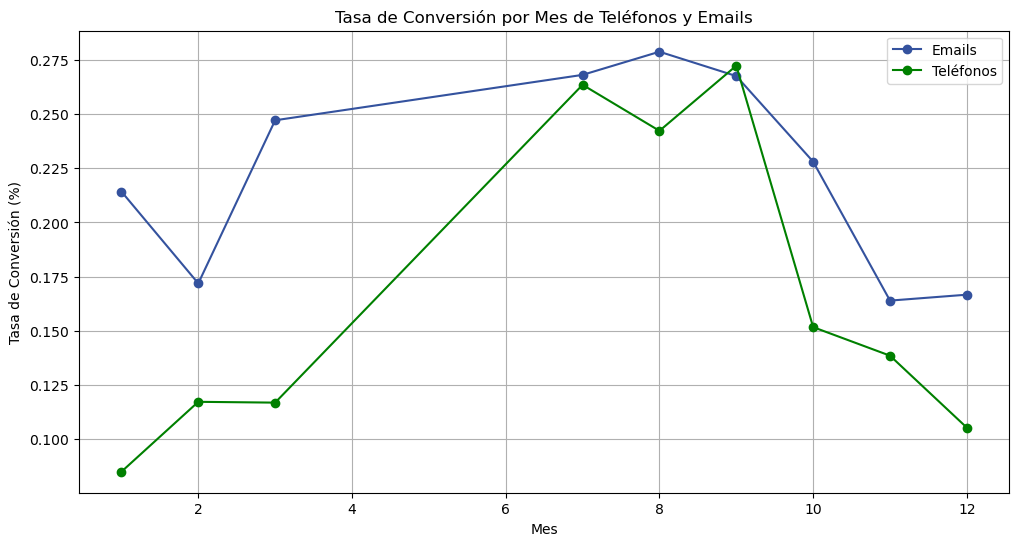

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(email_a_lo_largo_del_tiempo_por_mes[email_a_lo_largo_del_tiempo_por_mes["order_has_user_email"]==1]["Month"], email_a_lo_largo_del_tiempo_por_mes[email_a_lo_largo_del_tiempo_por_mes["order_has_user_email"]==1]["tasa_conv"], marker='o', color = "#34529e")
plt.plot(phone_a_lo_largo_del_tiempo_por_mes[phone_a_lo_largo_del_tiempo_por_mes["order_has_user_phone"]==1]["Month"], phone_a_lo_largo_del_tiempo_por_mes[phone_a_lo_largo_del_tiempo_por_mes["order_has_user_phone"]==1]["tasa_conv"], marker='o', color = "green")
plt.title('Tasa de Conversión por Mes de Teléfonos y Emails')
plt.xlabel('Mes')
plt.ylabel('Tasa de Conversión (%)')
plt.grid(True)
plt.legend(["Emails","Teléfonos"])
plt.show()

___

# Conversión por hora en la zona horaria de America/Nueva_York

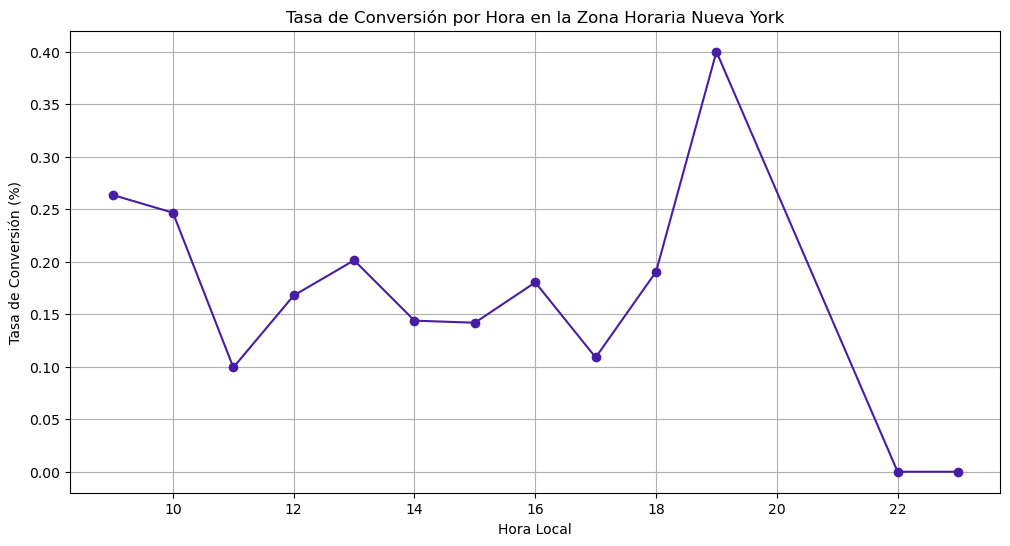

In [ ]:
import matplotlib.pyplot as plt

new_york_data = conv_df_by_tz.loc['America/New_York']

plt.figure(figsize=(12, 6))
plt.plot(new_york_data.index.get_level_values('local_time_apply'), new_york_data['%_conversion'], marker='o', color='#481da5')
plt.title('Tasa de Conversión por Hora en la Zona Horaria Nueva York')
plt.xlabel('Hora Local')
plt.ylabel('Tasa de Conversión (%)')
plt.grid(True)
plt.show()


____

# Conversión por hora por order_has_user_email y order_has_user_phone en la zona horaria de America/Nueva_York

In [ ]:
new_york_conversion = df_timezone[["order_has_user_email", "order_has_user_phone", "hrs-pyz", "local_time_apply", "conversion"]]
new_york_conversion = new_york_conversion[new_york_conversion["hrs-pyz"] == "America/New_York"]
new_york_conversion = new_york_conversion.groupby(["local_time_apply", "order_has_user_email", "order_has_user_phone"]).agg(cant_conversion =("conversion","sum"),
                            totales= ("conversion","count"),
                            tasa_conversion =("conversion","mean"))
new_york_conversion.reset_index(inplace=True)
new_york_conversion

,local_time_apply,order_has_user_email,order_has_user_phone,cant_conversion,totales,tasa_conversion
0,9,False,True,12,49,0.244898
1,9,True,True,17,61,0.278689
2,10,False,True,12,54,0.222222
3,10,True,True,25,96,0.260417
4,11,False,True,5,85,0.058824
5,11,True,True,9,56,0.160714
6,12,False,True,6,57,0.105263
7,12,True,True,18,86,0.209302
8,13,False,True,8,79,0.101266
9,13,True,True,22,70,0.314286


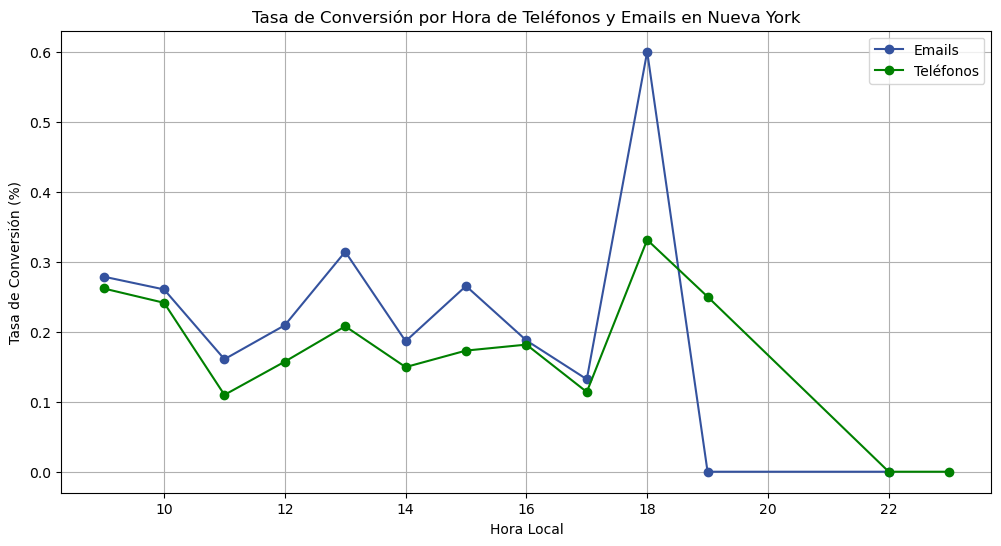

In [ ]:
email_data = new_york_conversion[new_york_conversion["order_has_user_email"] == 1]
phone_data = new_york_conversion[new_york_conversion["order_has_user_phone"] == 1]

email_grouped = email_data.groupby("local_time_apply")["tasa_conversion"].mean()
phone_grouped = phone_data.groupby("local_time_apply")["tasa_conversion"].mean() # Hago un promedio porque hay varios valores para la misma hora.
    
plt.figure(figsize=(12, 6))
plt.plot(email_grouped.index, email_grouped, marker='o', color="#34529e")
plt.plot(phone_grouped.index, phone_grouped, marker='o', color="green")
plt.title('Tasa de Conversión por Hora de Teléfonos y Emails en Nueva York')
plt.xlabel('Hora Local')
plt.ylabel('Tasa de Conversión (%)')
plt.grid(True)
plt.legend(["Emails", "Teléfonos"])
plt.show()
